# Understanding and Visualizing CNN

After the training is completed, we can use `VisualizeCNN` module to visualize and understand its decision making. This tutorial demonsrate several usefull functions that can be used for visualization.

First, we should import the module:

In [1]:
%run -i ../BaSe/VisualizeCNN.py
%matplotlib notebook

Using TensorFlow backend.


Now, we can initialize a `Vis` object. The following code will load the trained model and validation data (see CNN_training.ipynb).

In [2]:
x = "/Users/ulas/Projects/balancing_selection/Data/val_data/CNN_X_val_recent_1.npy"
y = "/Users/ulas/Projects/balancing_selection/Data/val_data/CNN_y_val_recent_1.npy"
model = "/Users/ulas/Projects/balancing_selection/Data/Model/CNN_model_recent_1.h5"

vis = Vis(model, x, y, test=1)

Next, we should select and an example input image that will be used in visualization by using `select_input(input_class)` function. Here, we should specify the class of input image. It will randomly select an image from the input data (`x`) that belongs to given class.

In [3]:
vis.select_input(input_class="Neutral", seed=1)

`vis_input()` function can be used to visualize the selected image.

<IPython.core.display.Javascript object>


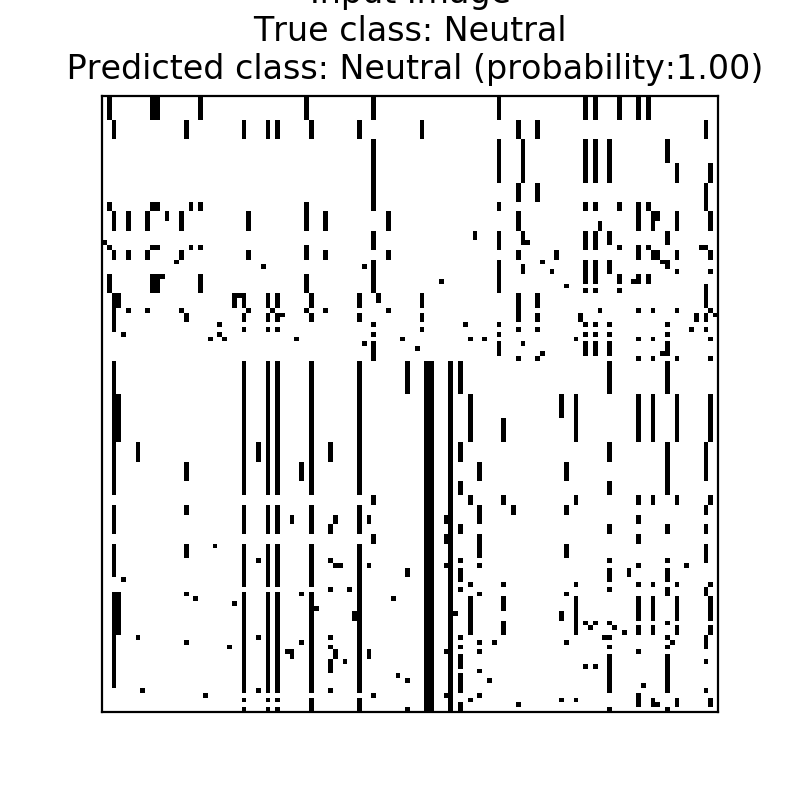

In [4]:
vis.vis_input(figsize=(4,4))

### Raw weights & activations
One attempt to understand CNN decision making may be visualizing the raw weights. We can do this by using `vis_raw_weights()` function. We need to specify the index of convolutional layer and filter. The following code will visualize all filters from the first convolutional layer:

<IPython.core.display.Javascript object>


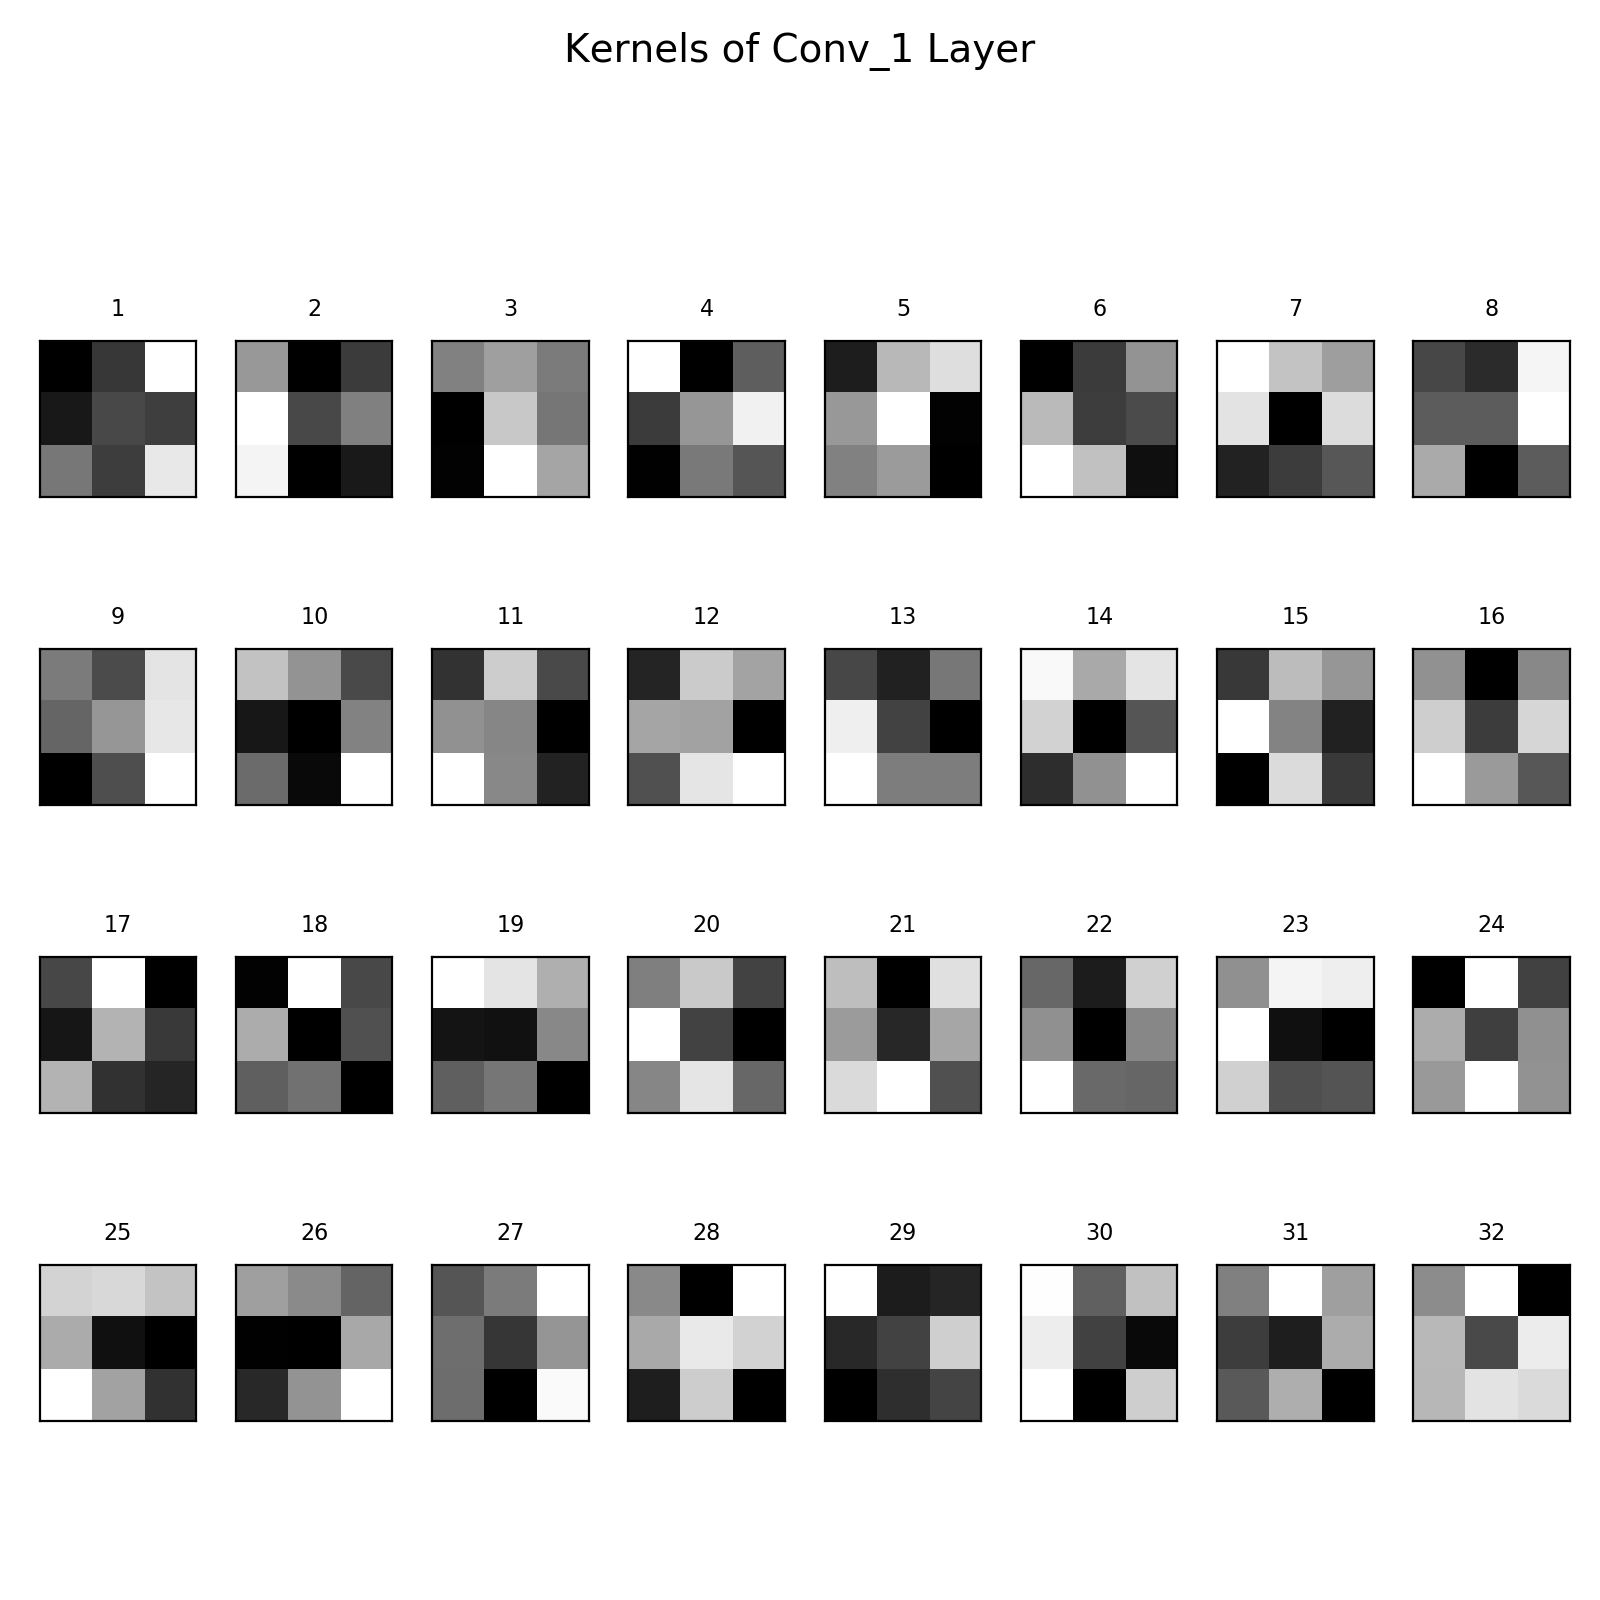

In [5]:
vis.vis_raw_weights(layer_idx=1, filter_idx="all", figsize=(8,8))

For humans, unfortunately, it is not quite possible to interpret these figures. An alternative technique may be to visualize the activations of the network during the forward pass, so that we can see what the network looks for. `vis_activations()` function will pass the selected input image from the given layer and filter, and will return the activations. So, running the following code, we will visualize activations of all the filters of the first conv layer.

<IPython.core.display.Javascript object>


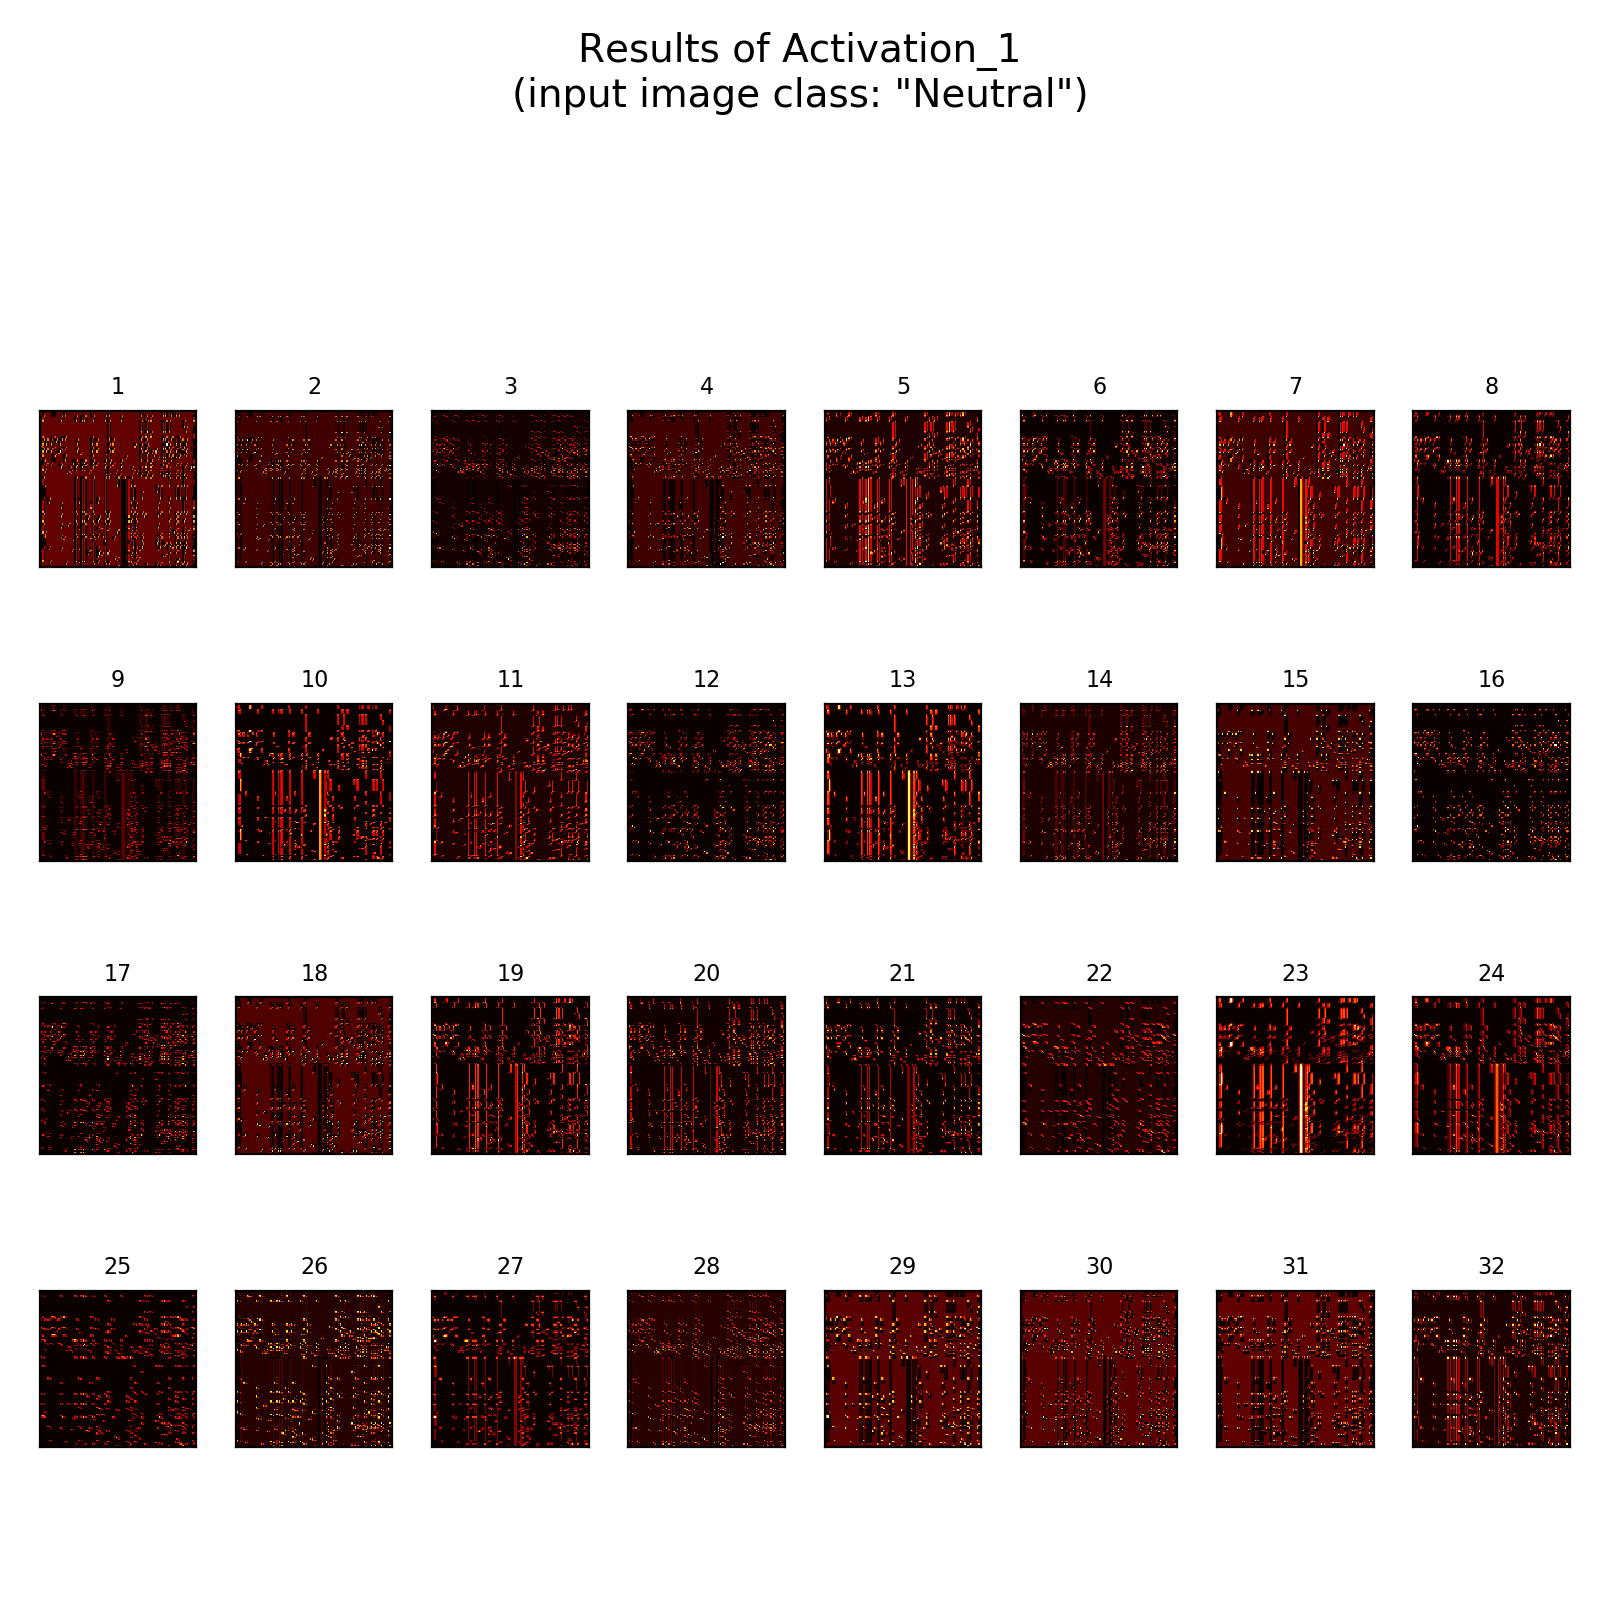

In [6]:
vis.vis_activations(layer_idx=1, filter_idx="all", figsize=(8,8))

The visualization of activations can also be used to notice dead filters, having all zero (black) values for many different inputs, which is an indication of high learning rates.

### PCA and t-SNE

CNN can be interpreted as gradually transforming the images into a representation where the classes are separable by a linear classifier. Therefore, we can get a rough idea about the topology of this space by embedding images into two dimensions. PCA and t-SNE are two methods that are commonly used to embed high-dimensional vectors in a low-dimensional space.

The last fully connected layer (layer immediately before the classifier) contains N-dimensional (N: num of units) feature vector. After running the model on many images and collecting the feature vectors, we can visualize them by dimension reduction:

<IPython.core.display.Javascript object>


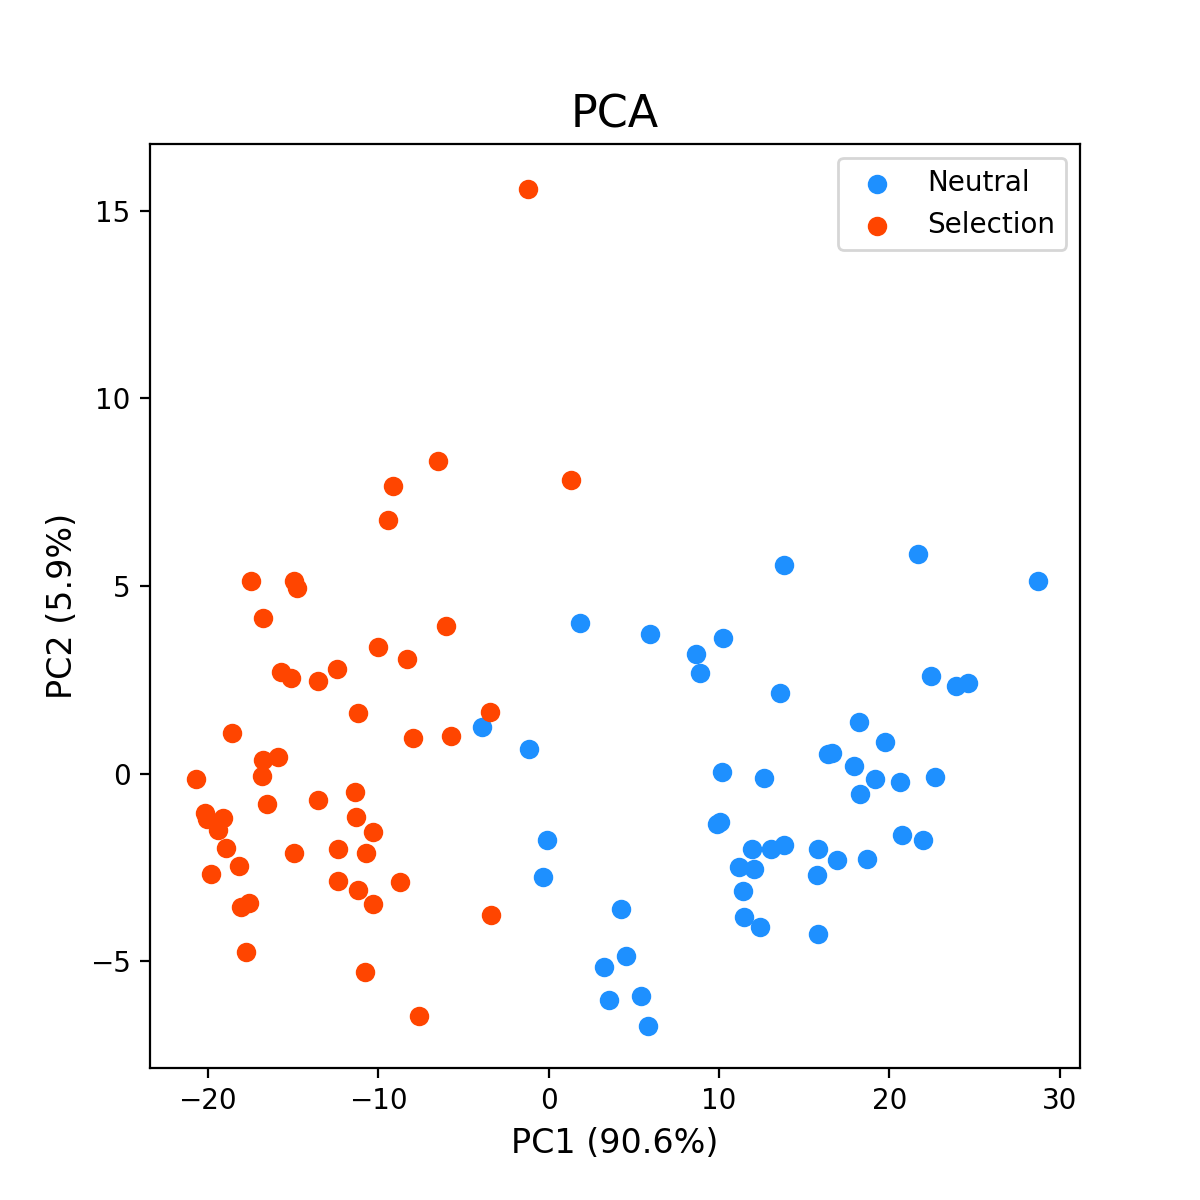

In [7]:
vis.vis_pca(n=100)

<IPython.core.display.Javascript object>


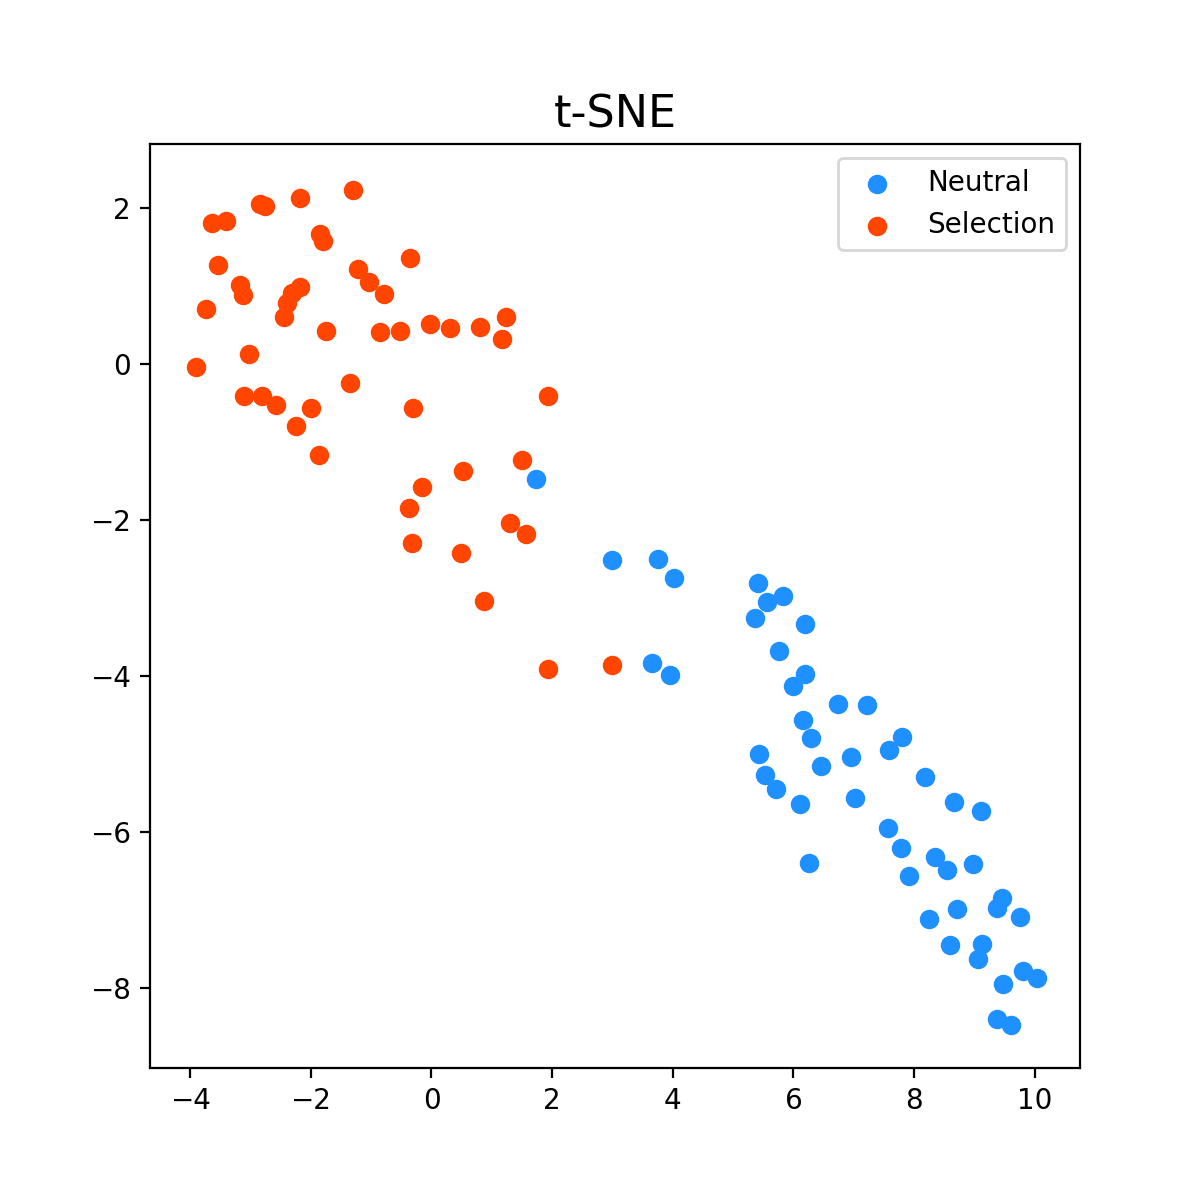

In [8]:
vis.vis_tsne(n=100)

These figure may help us to understand the topology of the space which is used by the network for decision making.

### Occlusion map
One way to investigate which part of the image is important in prediction is to plot the probability of the class of interest (e.g. neutral class) as a function of the position of an occluder object. That is, we iterate over regions of the image, set a patch of the image to be all zero, and look at the probability of the class. Then, we can visualize the probability as a heat map:

Padding...


<IPython.core.display.Javascript object>


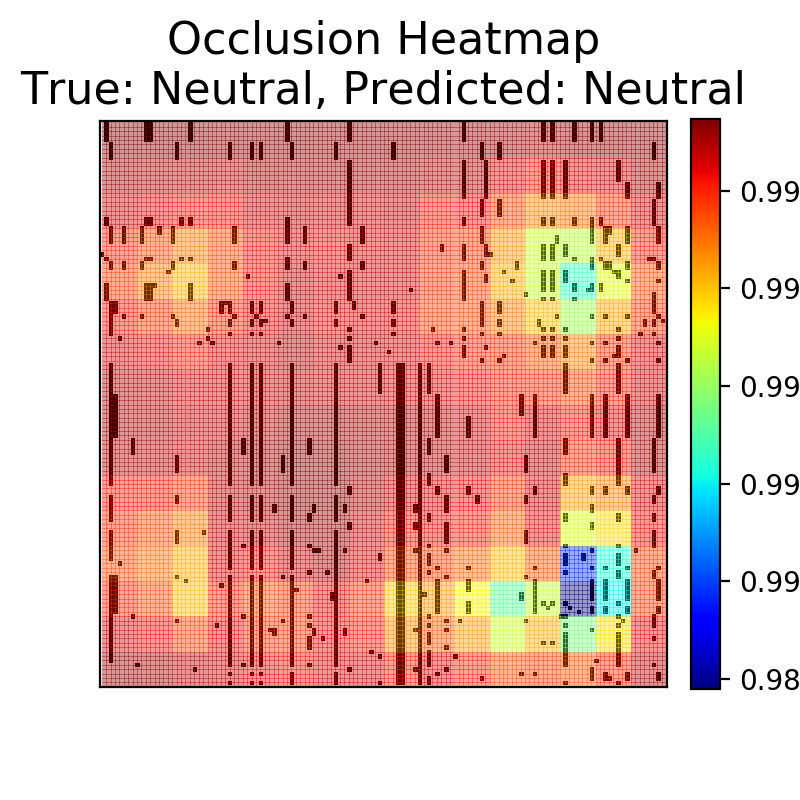

In [10]:
vis.vis_occlusion(occlusion_size=8, figsize=(4, 4))